In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import joblib

# Numbers

In [2]:
data = pd.read_csv('../model_data/extracted_data/data_numbers.csv',delimiter=' ', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,441,442,443,444,445,446,447,448,449,450
0,0.0,2.0,1.0,1.0,18.0,26.0,255.0,254.0,253.0,95.0,...,26.0,26.0,140.0,254.0,48.0,26.0,19.0,0.0,0.0,0.0
1,0.0,1.0,1.0,34.0,69.0,199.0,254.0,254.0,254.0,67.0,...,254.0,254.0,254.0,254.0,254.0,197.0,68.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,254.0,255.0,255.0,255.0,254.0,254.0,213.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,102.0,254.0,252.0,254.0,255.0,...,68.0,255.0,255.0,255.0,255.0,102.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,2.0,28.0,68.0,68.0,67.0,68.0,...,70.0,254.0,255.0,254.0,253.0,143.0,0.0,2.0,1.0,3.0


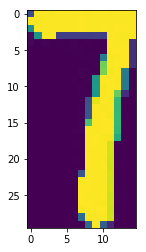

In [3]:
plt.imshow(data.iloc[15042].values[1:].reshape((30,15)))

In [4]:
y = data[0]
x = data.drop(columns=0)

## Preprocessing

### split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

### scaling

In [6]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Train + CrossVal

In [7]:
nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=400, verbose=3)
nn.fit(x_train, y_train.values)

Iteration 1, loss = 0.23500594
Iteration 2, loss = 0.01120744
Iteration 3, loss = 0.00516309
Iteration 4, loss = 0.00241529
Iteration 5, loss = 0.00145604
Iteration 6, loss = 0.00092231
Iteration 7, loss = 0.00066192
Iteration 8, loss = 0.00051205
Iteration 9, loss = 0.00041187
Iteration 10, loss = 0.00033954
Iteration 11, loss = 0.00029137
Iteration 12, loss = 0.00025344
Iteration 13, loss = 0.00023216
Iteration 14, loss = 0.00020345
Iteration 15, loss = 0.00018724
Iteration 16, loss = 0.00017179
Iteration 17, loss = 0.00016017
Iteration 18, loss = 0.00015005
Iteration 19, loss = 0.00014243
Iteration 20, loss = 0.00013485
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=400, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=3, warm_start=False)

## Test

In [8]:
y_pred = nn.predict(x_test)

In [9]:
accuracy_score(y_test.values, y_pred)

0.999

In [10]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[251,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 323,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 317,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 314,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 306,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0, 294,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 307,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 284,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0, 311,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0, 290]])

## Save

In [11]:
joblib.dump(nn, 'saved/nn_numbers.joblib')

['saved/nn_numbers.joblib']

In [12]:
joblib.dump(sc,'saved/scaler_numbers.joblib')

['saved/scaler_numbers.joblib']

# Letters

In [13]:
data = pd.read_csv('../model_data/extracted_data/data_letters.csv',delimiter=' ', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,441,442,443,444,445,446,447,448,449,450
0,0.0,0.0,1.0,1.0,1.0,11.0,212.0,254.0,255.0,255.0,...,0.0,2.0,0.0,1.0,1.0,1.0,34.0,72.0,23.0,0.0
1,0.0,0.0,0.0,0.0,255.0,255.0,254.0,0.0,0.0,1.0,...,3.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,255.0,255.0,253.0,254.0,255.0,...,1.0,0.0,0.0,0.0,0.0,0.0,21.0,57.0,55.0,55.0
3,0.0,0.0,5.0,142.0,254.0,254.0,142.0,5.0,0.0,0.0,...,0.0,1.0,3.0,1.0,0.0,67.0,255.0,67.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,178.0,254.0,255.0,254.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,144.0,144.0,0.0


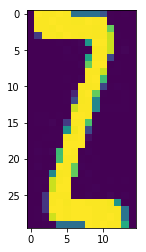

In [14]:
plt.imshow(data.iloc[50029].values[1:].reshape((30,15)))

In [15]:
y = data[0]
x = data.drop(columns=0)

## Preprocessing

### Split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

### Scaling

In [17]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Train + CrossValidation

In [18]:
nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=400, verbose=3)
nn.fit(x_train, y_train.values)

Iteration 1, loss = 0.34026636
Iteration 2, loss = 0.03304543
Iteration 3, loss = 0.01652656
Iteration 4, loss = 0.00966377
Iteration 5, loss = 0.00539045
Iteration 6, loss = 0.00331120
Iteration 7, loss = 0.00226739
Iteration 8, loss = 0.00141538
Iteration 9, loss = 0.00090311
Iteration 10, loss = 0.00080252
Iteration 11, loss = 0.00081475
Iteration 12, loss = 0.00047316
Iteration 13, loss = 0.00037827
Iteration 14, loss = 0.00032534
Iteration 15, loss = 0.00028689
Iteration 16, loss = 0.00026077
Iteration 17, loss = 0.00023735
Iteration 18, loss = 0.00021777
Iteration 19, loss = 0.00020274
Iteration 20, loss = 0.00019141
Iteration 21, loss = 0.00018007
Iteration 22, loss = 0.00017019
Iteration 23, loss = 0.00016299
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=400, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=3, warm_start=False)

## Test

In [19]:
y_pred = nn.predict(x_test)

In [20]:
accuracy_score(y_test.values, y_pred)

0.9973076923076923

In [21]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[306,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 284,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 312,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 306,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 289,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1, 285,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 301,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   

## Save

In [22]:
joblib.dump(nn, 'saved/nn_letters.joblib')

['saved/nn_letters.joblib']

In [23]:
joblib.dump(sc,'saved/scaler_letters.joblib')

['saved/scaler_letters.joblib']